<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/Lab04_penalized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Artificial data
n = 1000
np.random.seed(42)
true_betas = np.zeros(50)
true_betas[:10] = np.random.uniform(-10,10,10)

X = np.random.uniform(-1, 1, (n, 50))
y = X @ true_betas + np.random.normal(0, 1, n)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training


lambdas = np.arange(0.05, n, 0.1)
alphas = lambdas / n

ridge_models = [Ridge(alpha=a, random_state=42).fit(X_train, y_train) for a in alphas]
lasso_models = [Lasso(alpha=a, random_state=42).fit(X_train, y_train) for a in alphas]

ridge_results = pd.DataFrame({
    'alpha': alphas,
    'bias_squared': [(np.mean(model.predict(X_test)) - np.mean(y_test)) ** 2 for model in ridge_models],
    'variance': [np.var(model.predict(X_test)) for model in ridge_models],
    'mse': [mean_squared_error(y_test, model.predict(X_test)) for model in ridge_models]
})

lasso_results = pd.DataFrame({
    'alpha': alphas,
    'bias_squared': [(np.mean(model.predict(X_test)) - np.mean(y_test)) ** 2 for model in lasso_models],
    'variance': [np.var(model.predict(X_test)) for model in lasso_models],
    'mse': [mean_squared_error(y_test, model.predict(X_test)) for model in lasso_models]
})


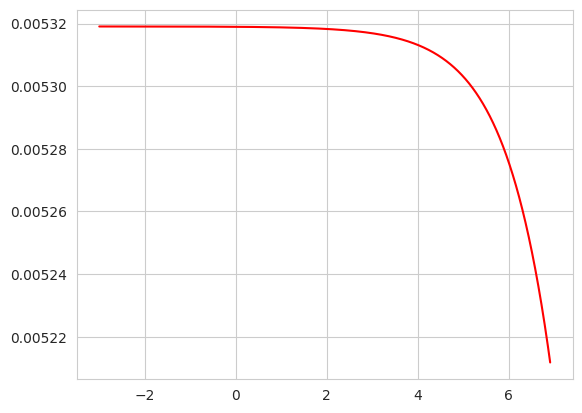

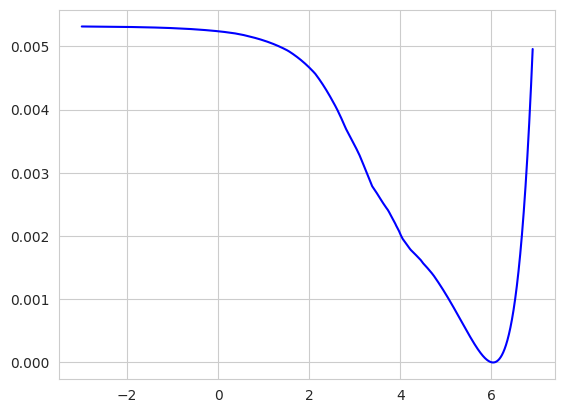

In [75]:
# Calculate bias^2 for Ridge models
ridge_predictions = [model.predict(X_test) for model in ridge_models]
ridge_bias_squared = [(np.mean(pred) - np.mean(y_test))**2 for pred in ridge_predictions]

# Calculate bias^2 for Lasso models
lasso_predictions = [model.predict(X_test) for model in lasso_models]
lasso_bias_squared = [(np.mean(pred) - np.mean(y_test))**2 for pred in lasso_predictions]

plt.plot(np.log(lambdas), ridge_bias_squared, label='Ridge Bias^2', color='red')
plt.show()
plt.plot(np.log(lambdas), lasso_bias_squared, label='Lasso Bias^2', color='blue')
plt.show()

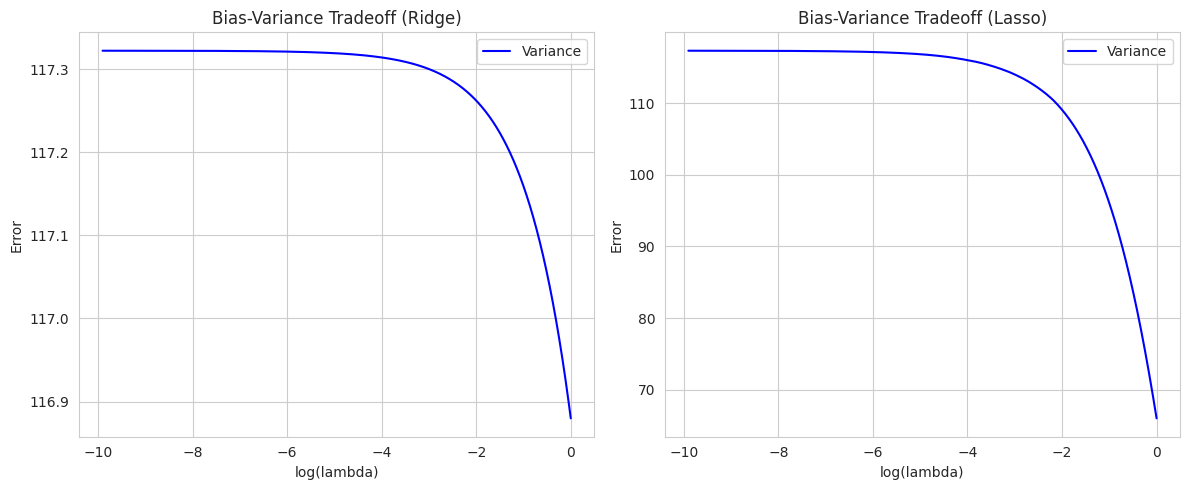

In [73]:
import seaborn as sns

ridge_results['log_alpha'] = np.log(ridge_results['alpha'])
lasso_results['log_alpha'] = np.log(lasso_results['alpha'])

# Wykresy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
#sns.lineplot(data=ridge_results, x='log_alpha', y='bias_squared', label='Bias²', color='red')
sns.lineplot(data=ridge_results, x='log_alpha', y='variance', label='Variance', color='blue')
#sns.lineplot(data=ridge_results, x='log_alpha', y='mse', label='MSE', color='black')
plt.xlabel('log(lambda)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff (Ridge)')
plt.legend()

plt.subplot(1, 2, 2)
#sns.lineplot(data=lasso_results, x='log_alpha', y='bias_squared', label='Bias²', color='red')
sns.lineplot(data=lasso_results, x='log_alpha', y='variance', label='Variance', color='blue')
#sns.lineplot(data=lasso_results, x='log_alpha', y='mse', label='MSE', color='black')
plt.xlabel('log(lambda)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff (Lasso)')
plt.legend()

plt.tight_layout()
plt.show()